In [43]:
from __future__ import annotations
try:
    from scripts_for_plotting import *
except ModuleNotFoundError:
    import sys
    sys.path.append('../')
    from scripts_for_plotting import *
import scienceplots
plt.style.use(['science', 'notebook'])

In [59]:
multwavs = [22587.95,22593.85,22613.8,22634,22659.4,22680.5,22691.75,22703,22713.25,22773.25,22783.3,22789.35,22915.25,23028.35,23067.25,23655.35,
            22920.00, 23292.60]

outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/asas-rcb-21/Sep-26-2024-00-12-46_0.07695476422793779_LTE_N_1D"

In [60]:
config_dict = load_output_data(outpath)

/media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/scripts_for_plotting.py:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  output_file_df = output_file_df.apply(pd.to_numeric, errors='ignore')


In [61]:
output_results_pd_df = config_dict["output_file_df"] 

In [62]:
output_trimmed = (output_results_pd_df[output_results_pd_df["chi_squared"] < 20])
output_trimmed = output_trimmed.reset_index(drop=True)
output_trimmed2 = output_trimmed[~output_trimmed["wave_center"].isin(multwavs)]

In [54]:
output_trimmed2

,specname,wave_center,wave_start,wave_end,Doppler_Shift_add_to_RV,Fe_H,N_Fe,Microturb,Macroturb,rotation,chi_squared,ew,flag_error,flag_warning
0,ASAS-RCB-21.txt,22598.75,22597.5,22600.0,-0.0836,0.0,1.4404,6.0,0.0,0.0,14.161550,287.5487,0,0
1,ASAS-RCB-21.txt,22617.20,22616.4,22618.0,0.8238,0.0,1.2789,6.0,0.0,0.0,1.524867,270.2662,0,0
3,ASAS-RCB-21.txt,22663.50,22662.0,22665.0,0.2724,0.0,1.5237,6.0,0.0,0.0,6.956332,328.3870,0,0
4,ASAS-RCB-21.txt,22673.40,22672.0,22674.8,-0.3123,0.0,1.2925,6.0,0.0,0.0,10.110236,315.1093,0,0
5,ASAS-RCB-21.txt,22676.40,22675.0,22677.8,0.0242,0.0,1.5489,6.0,0.0,0.0,6.437566,382.9185,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,ASAS-RCB-21.txt,23190.90,23189.4,23192.4,0.9714,0.0,1.3366,11.0,0.0,0.0,7.540687,499.9331,0,0
200,ASAS-RCB-21.txt,23414.70,23413.7,23415.7,1.3506,0.0,1.3441,11.0,0.0,0.0,12.878735,228.3038,0,0
201,ASAS-RCB-21.txt,23417.80,23416.7,23418.9,-0.2038,0.0,1.4701,11.0,0.0,0.0,8.230940,287.9428,0,0
203,ASAS-RCB-21.txt,24019.20,24017.9,24020.5,1.2728,0.0,1.2608,11.0,0.0,0.0,4.159335,245.7997,0,0


6.0 -6.176251490902819e-05 16
7.0 -3.741595926451431e-06 15
8.0 -1.1647852606278654e-05 15
9.0 6.868522783129551e-05 15
10.0 4.614852078901642e-05 15
11.0 -2.7327970937827172e-05 14


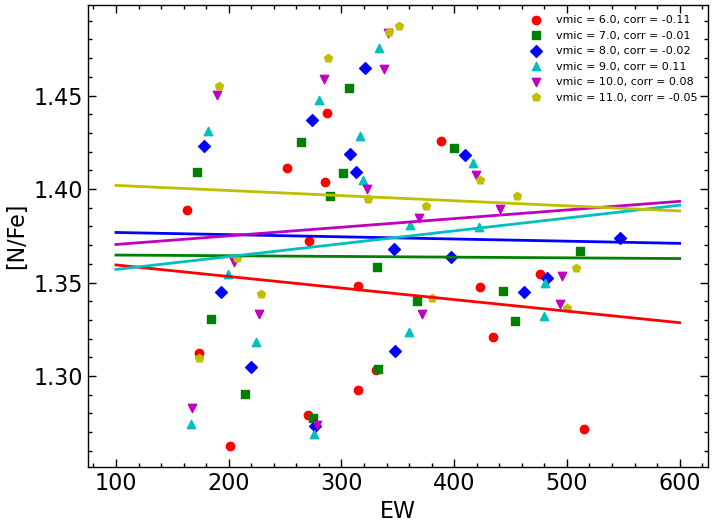

In [56]:
vmics = np.unique(output_trimmed2["Microturb"].values)
cs = ['r', 'g', 'b', 'c', 'm', 'y']
markers = ['o', 's', 'D', '^', 'v', 'p']
for i in range(len(vmics)):
    vmic = vmics[i]
    output_trimmed3 = output_trimmed2[output_trimmed2["Microturb"] == vmic]
    ews = np.array(output_trimmed3["ew"])
    nfes = np.array(output_trimmed3["N_Fe"])
    mean_nfe = np.mean(nfes)
    std_nfe = np.std(nfes)
    choose_idxs = np.where(np.abs(nfes - mean_nfe) < 1*std_nfe)
    choose_idxs = choose_idxs[0]
    ews = ews[choose_idxs]
    nfes = nfes[choose_idxs]
    corr = np.corrcoef(ews,nfes)[0,1]
    corr = corr.round(2)
    plt.scatter(ews,nfes, c=cs[i], marker = markers[i], label = f"vmic = {vmics[i]}, corr = {corr}")
    m,c = np.polyfit(ews,nfes,1)
    x = np.linspace(100, 600, 100)
    y = m*x + c
    print(vmics[i], m, len(nfes))
    plt.plot(x,y, c = cs[i])
    plt.legend(fontsize = 8)
    plt.ylabel("[N/Fe]")
    plt.xlabel("EW")

7.5 -9.603083477152706e-08 15
8.5 8.002056350315673e-05 15


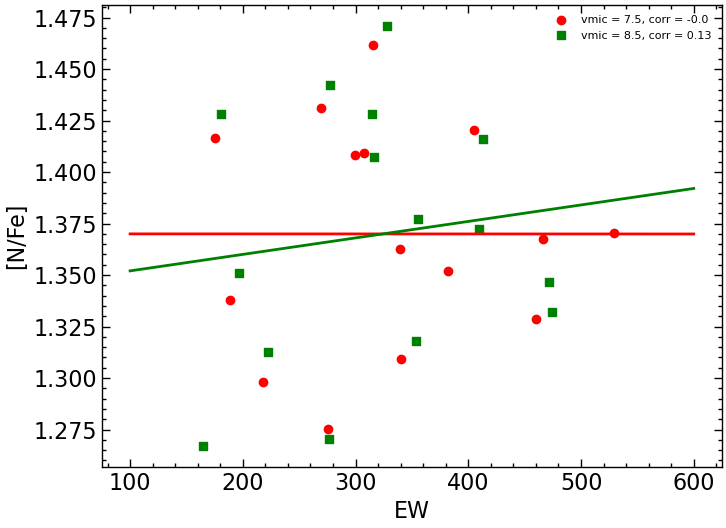

In [64]:
vmics = np.unique(output_trimmed2["Microturb"].values)
cs = ['r', 'g', 'b', 'c', 'm', 'y']
markers = ['o', 's', 'D', '^', 'v', 'p']
for i in range(len(vmics)):
    vmic = vmics[i]
    output_trimmed3 = output_trimmed2[output_trimmed2["Microturb"] == vmic]
    ews = np.array(output_trimmed3["ew"])
    nfes = np.array(output_trimmed3["N_Fe"])
    mean_nfe = np.mean(nfes)
    std_nfe = np.std(nfes)
    choose_idxs = np.where(np.abs(nfes - mean_nfe) < 1*std_nfe)
    choose_idxs = choose_idxs[0]
    ews = ews[choose_idxs]
    nfes = nfes[choose_idxs]
    corr = np.corrcoef(ews,nfes)[0,1]
    corr = corr.round(2)
    plt.scatter(ews,nfes, c=cs[i], marker = markers[i], label = f"vmic = {vmics[i]}, corr = {corr}")
    m,c = np.polyfit(ews,nfes,1)
    x = np.linspace(100, 600, 100)
    y = m*x + c
    print(vmics[i], m, len(nfes))
    plt.plot(x,y, c = cs[i])
    plt.legend(fontsize = 8)
    plt.ylabel("[N/Fe]")
    plt.xlabel("EW")

In [67]:
output_trimmed3 = output_trimmed2[output_trimmed2["Microturb"] == 7.5]

In [70]:
output_results_pd_df = config_dict["output_file_df"] 
output_trimmed = (output_results_pd_df[output_results_pd_df["chi_squared"] < 20])
output_trimmed = output_trimmed[output_trimmed["Microturb"] == 7.5]
output_trimmed = output_trimmed.reset_index(drop=True)

In [71]:
np.mean(output_trimmed["N_Fe"].values), np.std(output_trimmed3["N_Fe"].values)

(np.float64(1.3762514285714285), np.float64(0.11654866763323951))

In [79]:
1.3762 + 7.98

9.356200000000001

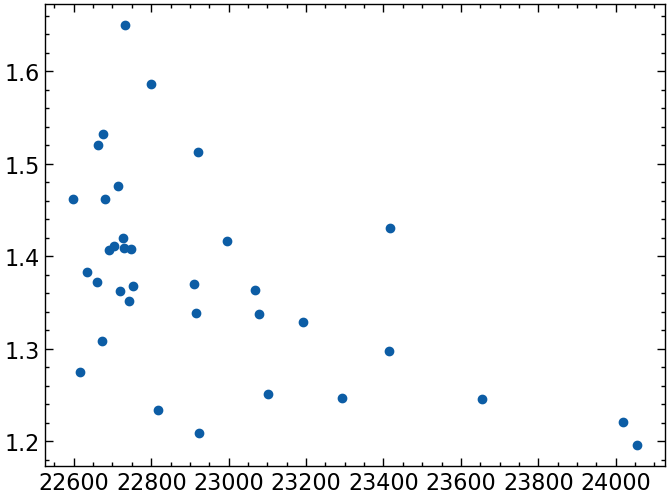

In [72]:
plt.scatter(output_trimmed['wave_center'] ,output_trimmed["N_Fe"])

In [92]:
outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/asas-rcb-21/Sep-26-2024-02-13-20_0.7593992335381545_LTE_N_1D"
config_dict = load_output_data(outpath)
output_results_pd_df = config_dict["output_file_df"]
output_trimmed = (output_results_pd_df[output_results_pd_df["chi_squared"] < 20])

/media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/scripts_for_plotting.py:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  output_file_df = output_file_df.apply(pd.to_numeric, errors='ignore')


In [93]:
np.mean(output_trimmed["Macroturb"]), np.std(output_trimmed["Macroturb"])

(np.float64(8.0), np.float64(0.0))

In [90]:
np.mean(output_trimmed["N_Fe"].values), np.std(output_trimmed3["N_Fe"].values).round(3)

(np.float64(1.405997142857143), np.float64(0.117))

In [95]:
np.mean(output_trimmed["N_Fe"].values).round(3) + 7.98

np.float64(9.416)

In [94]:
np.mean(output_trimmed["N_Fe"].values), np.std(output_trimmed3["N_Fe"].values).round(3)

(np.float64(1.4355416666666665), np.float64(0.117))